In [1]:
import os
import sys
import numpy as np

import matplotlib.pyplot as plt
from skimage.io import imread
from skimage import filters as skfilt

In [2]:
sys.path.append('/Users/mm40108/projects/datadays17/olfactory_protein_viz/src/')
from data.ABA_utils import get_products, get_genes, get_genes_from_aliases, get_experiments_and_images
from data.ABA_image_utils import get_image, get_organism_image_params, save_image_locally
from features.image_processing import read_images_in, process_raw_image, get_image_segment, monochrome_image, invert_image
from visualization.make_plots import plot_expanding_rows, plot_channels

THIS_DIR = "/Users/mm40108/projects/datadays17/olfactory_protein_viz/src/data"
DATA_DIR = "/Users/mm40108/projects/datadays17/olfactory_protein_viz/data"

In [3]:
# 0. After running ingestion module, this is what we have so far
product = 'DevMouse'
genes = get_genes(product)
genes_of_interest = ['Robo2', 'Cdh5', 'Bmpr2']
our_genes = genes[genes.acronym.isin(genes_of_interest)]
our_gene_ids = our_genes.gene_id.values.tolist()
exp_data, img_data = get_experiments_and_images(genes_of_interest, organism=product)

	attempting query: http://api.brain-map.org/api/v2/data/Gene/query.json?criteria=model::Gene,rma::criteria,products[abbreviation$eq'DevMouse']&num_rows=all
	response: (2107, 16) 
	 Index(['acronym', 'alias_tags', 'chromosome_id', 'ensembl_id', 'entrez_id',
       'genomic_reference_update_id', 'homologene_id', 'gene_id',
       'legacy_ensembl_gene_id', 'name', 'organism_id', 'original_name',
       'original_symbol', 'reference_genome_id', 'sphinx_id',
       'version_status'],
      dtype='object')
	attempting query: http://api.brain-map.org/api/v2/data/Gene/query.json?criteria=model::Gene,rma::criteria,products[abbreviation$eq'DevMouse']&num_rows=all
	response: (2107, 16) 
	 Index(['acronym', 'alias_tags', 'chromosome_id', 'ensembl_id', 'entrez_id',
       'genomic_reference_update_id', 'homologene_id', 'gene_id',
       'legacy_ensembl_gene_id', 'name', 'organism_id', 'original_name',
       'original_symbol', 'reference_genome_id', 'sphinx_id',
       'version_status'],
      dtyp

	response: (18, 25) 
	 Index(['annotated', 'axes', 'bits_per_component', 'data_set_id',
       'expression_path', 'failed', 'height', 'id', 'image_height',
       'image_type', 'image_width', 'isi_experiment_id', 'lims1_id',
       'number_of_components', 'ophys_experiment_id', 'path',
       'projection_function', 'resolution', 'section_number', 'specimen_id',
       'structure_id', 'tier_count', 'width', 'x', 'y'],
      dtype='object')
getting all images for experiment_id 100045355
	attempting query: http://api.brain-map.org/api/v2/data/query.json?criteria=model::SectionImage,rma::criteria,[data_set_id$eq100045355]&num_rows=all
	response: (18, 25) 
	 Index(['annotated', 'axes', 'bits_per_component', 'data_set_id',
       'expression_path', 'failed', 'height', 'id', 'image_height',
       'image_type', 'image_width', 'isi_experiment_id', 'lims1_id',
       'number_of_components', 'ophys_experiment_id', 'path',
       'projection_function', 'resolution', 'section_number', 'specimen_id

	response: (17, 25) 
	 Index(['annotated', 'axes', 'bits_per_component', 'data_set_id',
       'expression_path', 'failed', 'height', 'id', 'image_height',
       'image_type', 'image_width', 'isi_experiment_id', 'lims1_id',
       'number_of_components', 'ophys_experiment_id', 'path',
       'projection_function', 'resolution', 'section_number', 'specimen_id',
       'structure_id', 'tier_count', 'width', 'x', 'y'],
      dtype='object')
getting all images for experiment_id 100056407
	attempting query: http://api.brain-map.org/api/v2/data/query.json?criteria=model::SectionImage,rma::criteria,[data_set_id$eq100056407]&num_rows=all
	response: (16, 25) 
	 Index(['annotated', 'axes', 'bits_per_component', 'data_set_id',
       'expression_path', 'failed', 'height', 'id', 'image_height',
       'image_type', 'image_width', 'isi_experiment_id', 'lims1_id',
       'number_of_components', 'ophys_experiment_id', 'path',
       'projection_function', 'resolution', 'section_number', 'specimen_id

[100046444, 100042306, 69529382, 100057140, 100057296, 100046631, 100042432, 100081744, 71281319, 100045355, 100047274, 100045469, 100046870, 100072173, 100047596, 100071976, 77931975, 100058500, 100078477, 100084794, 100058480, 100082796, 100056407, 100056766, 100072907, 100056389]
chosen experiment id:  100042306
read_images_in( /Users/mm40108/projects/datadays17/olfactory_protein_viz/data/DevMouse/Bmpr2/100042306 ): /Users/mm40108/projects/datadays17/olfactory_protein_viz/data/DevMouse/Bmpr2/100042306/10_100878687.jpg
	/Users/mm40108/projects/datadays17/olfactory_protein_viz/data/DevMouse/Bmpr2/100042306/11_100878705.jpg
	/Users/mm40108/projects/datadays17/olfactory_protein_viz/data/DevMouse/Bmpr2/100042306/12_100878600.jpg
	/Users/mm40108/projects/datadays17/olfactory_protein_viz/data/DevMouse/Bmpr2/100042306/13_100878599.jpg
	/Users/mm40108/projects/datadays17/olfactory_protein_viz/data/DevMouse/Bmpr2/100042306/14_100878601.jpg
	/Users/mm40108/projects/datadays17/olfactory_protein

/Users/mm40108/projects/datadays17/olfactory_protein_viz/venv/lib/python3.6/site-packages/PIL/Image.py:2509: DecompressionBombWarning: Image size (114636032 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)
/Users/mm40108/projects/datadays17/olfactory_protein_viz/venv/lib/python3.6/site-packages/PIL/Image.py:2509: DecompressionBombWarning: Image size (122435072 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)
/Users/mm40108/projects/datadays17/olfactory_protein_viz/venv/lib/python3.6/site-packages/PIL/Image.py:2509: DecompressionBombWarning: Image size (95477760 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)
/Users/mm40108/projects/datadays17/olfactory_protein_viz/venv/lib/python3.6/site-packages/PIL/Image.py:2509: DecompressionBombWarning: Image size (113417472 pixels) exceeds limit of 89478485 pixels, c

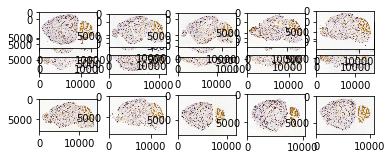

In [4]:
# 1. User is presented with genes selected from previous step and asked to pick 1 experiment from 1 gene
exp_ids = exp_data.experiment_id.values.tolist()
img_ids = img_data.id.values.tolist()

# 1a. choose one experiment to test processing on
print(exp_ids)
gene = 'Bmpr2'
experiment = '100042306'
print('chosen experiment id: ', experiment)

# preview slices in that experiment
exp_dir = os.path.join(DATA_DIR, product, gene, experiment)
img_dict = read_images_in(exp_dir)
# plot them in row
fig = plot_expanding_rows(img_dict)
fig.show()

In [7]:
gene = 'Bmpr2'
experiment = 100042306
ex = exp_data[exp_data.experiment_id == experiment]
ex

,blue_channel,delegate,expression,failed,failed_facet,green_channel,experiment_id,name,plane_of_section_id,qc_date,red_channel,reference_space_id,rnaseq_design_id,section_thickness,specimen_id,sphinx_id,storage_directory,weight,gene_id
1,None,True,True,False,734881840,None,100042306,None,2,2009-02-18T14:28:00Z,None,8,None,25.0,4797,83381,/external/devmouse/prod165/image_series_100042...,5200,11954


TypeError: show() got an unexpected keyword argument 'figsize'

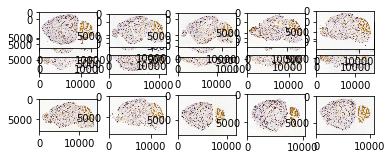

In [9]:
fig = plot_expanding_rows(img_dict)
fig.show(figsize=(12,12))

In [5]:
# 1b. choose one image from experiment to test processing on
print(img_ids)
img_id = '100878599'
print('chosen image id: ', img_id)
img = img_dict['/Users/mm40108/projects/datadays17/olfactory_protein_viz/data/DevMouse/Bmpr2/100042306/13_100878599.jpg']

[100938255, 100938261, 100938266, 100938259, 100938252, 100938260, 100938265, 100938248, 100938251, 100938263, 100938247, 100938258, 100938249, 100938264, 100938254, 100938257, 100938256, 100938253, 100878637, 100878602, 100878665, 100878689, 100878635, 100878664, 100878663, 100878703, 100878704, 100878687, 100878705, 100878600, 100878599, 100878601, 100878666, 100878636, 100878688, 100878706, 100878690, 100878638, 69507274, 69507238, 69507244, 69507252, 69507268, 69507270, 69507258, 69507240, 69507272, 69507282, 69507250, 69507284, 69507280, 69507264, 69507254, 69507260, 69507262, 69507278, 69507242, 69507248, 101117275, 101117284, 101117269, 101117278, 101117279, 101117283, 101117281, 101117271, 101117266, 101117273, 101117274, 101117276, 101117282, 101117267, 101117268, 101117272, 101117277, 101120110, 101120108, 101120114, 101120101, 101120104, 101120102, 101120096, 101120105, 101120098, 101120111, 101120099, 101120113, 101120107, 101120112, 101120103, 101120097, 101120106, 1011201

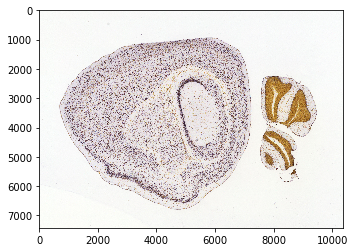

In [6]:
plt.imshow(img)

(7424, 10368, 3)
x_from 2000
x_to 7000
y_to 5000
(7424, 10368, 3)


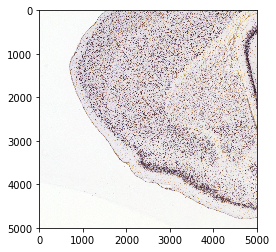

In [52]:
print(img.shape)
#2 User crops image
olf_crop = get_image_segment(img, x_from=2000, x_to=7000, y_to=5000)
plt.imshow(olf_crop)

(7424, 10368, 3)


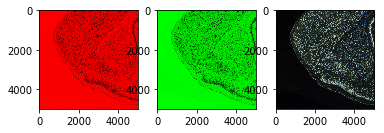

In [59]:
# 3 guide user through invert image

# channels before
channels_before = plot_channels(olf_crop, plt.figure(), start_subplot=1)

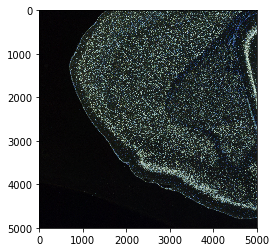

In [61]:
# invert
inverted_img = invert_image(olf_crop)
plt.imshow(inverted_img)

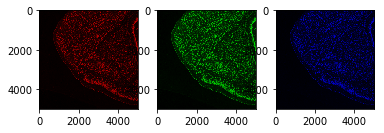

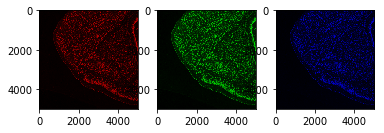

In [62]:
# channels after
plot_channels(inverted_img, plt.figure(), start_subplot=1)

no special channels


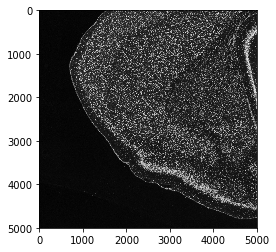

In [67]:
# 4 guide user through making monochrome image

# show user that correct channels selected according to experimental metadata
exp_metadata = exp_data[exp_data.experiment_id == int(experiment)]
exp_metadata.head()

# with correct colors selected, make image monochrome
exp_params = ecimg.get_imaging_params(experiment)
monochrome_img = monochrome_image(inverted_img, exp_params)

plt.imshow(monochrome_img, cmap='gray')